# Importing data from other file types

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-other-file-types" data-toc-modified-id="Introduction-to-other-file-types-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to other file types</a></span><ul class="toc-item"><li><span><a href="#Not-so-flat-any-more" data-toc-modified-id="Not-so-flat-any-more-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Not so flat any more</a></span></li><li><span><a href="#Creating-a-pickle-file" data-toc-modified-id="Creating-a-pickle-file-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating a pickle file</a></span></li><li><span><a href="#Loading-a-pickled-file" data-toc-modified-id="Loading-a-pickled-file-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Loading a pickled file</a></span></li><li><span><a href="#Listing-sheets-in-Excel-files" data-toc-modified-id="Listing-sheets-in-Excel-files-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Listing sheets in Excel files</a></span></li><li><span><a href="#Importing-sheets-from-Excel-files" data-toc-modified-id="Importing-sheets-from-Excel-files-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Importing sheets from Excel files</a></span></li><li><span><a href="#Customizing-your-spreadsheet-import" data-toc-modified-id="Customizing-your-spreadsheet-import-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Customizing your spreadsheet import</a></span></li></ul></li><li><span><a href="#Importing-SAS/Stata-files-using-pandas" data-toc-modified-id="Importing-SAS/Stata-files-using-pandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing SAS/Stata files using pandas</a></span><ul class="toc-item"><li><span><a href="#Importing-SAS-files" data-toc-modified-id="Importing-SAS-files-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing SAS files</a></span></li><li><span><a href="#Importing-Stata-files" data-toc-modified-id="Importing-Stata-files-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Importing Stata files</a></span></li></ul></li><li><span><a href="#Importing-HDF5-files" data-toc-modified-id="Importing-HDF5-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing HDF5 files</a></span><ul class="toc-item"><li><span><a href="#Using-h5py-to-import-HDF5-files" data-toc-modified-id="Using-h5py-to-import-HDF5-files-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Using h5py to import HDF5 files</a></span></li><li><span><a href="#Extracting-data-from-your-HDF5-file" data-toc-modified-id="Extracting-data-from-your-HDF5-file-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extracting data from your HDF5 file</a></span></li></ul></li><li><span><a href="#Importing-MATLAB-files" data-toc-modified-id="Importing-MATLAB-files-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Importing MATLAB files</a></span><ul class="toc-item"><li><span><a href="#Loading-.mat-files" data-toc-modified-id="Loading-.mat-files-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Loading .mat files</a></span></li><li><span><a href="#The-structure-of-.mat-in-Python" data-toc-modified-id="The-structure-of-.mat-in-Python-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>The structure of .mat in Python</a></span></li></ul></li></ul></div>

## Introduction to other file types

- Other file types
    - Excel spreadsheets 
    - MATLAB files
    - SAS files
    - Stata files
    - HDF5 files
        - More prevalent to store large datasets
- Pickled files
    - File type native to Python
    - Motivation: many datatypes for which it isn’t obvious how to store them
        - such as dictionary or list
    - Pickled files are serialized
    - Serialize = convert object to bytestream
        - bytestream = sequence of bytes

### Not so flat any more

- to explore your current working directory
        ! ls
- do this natively in Python using the library os
        import os
        wd = os.getcwd()
        os.listdir(wd)
    - os consists of miscellaneous operating system interfaces.

In [1]:
!ls
import os
wd = os.getcwd()
os.listdir(wd)


CH1_Introduction and flat files.ipynb
CH2_Importing data from other file types.ipynb
exercise


['.DS_Store',
 'CH2_Importing data from other file types.ipynb',
 'exercise',
 '.ipynb_checkpoints',
 'CH1_Introduction and flat files.ipynb']

### Creating a pickle file

In [2]:
import pickle

data = {'June': '69.4', 'Aug': '85', 'Airline': '8', 'Mar': '84.4'}

# Store data (serialize)
with open('exercise/creat_a_pickle.pickle', 'wb') as file:
    pickle.dump(data, file, protocol=pickle.HIGHEST_PROTOCOL)
# The advantage of HIGHEST_PROTOCOL is that files get smaller.
# This makes unpickling sometimes much faster.

# Load data (deserialize)
with open('exercise/creat_a_pickle.pickle', 'rb') as file:
    unserialized_data = pickle.load(file)

print(data == unserialized_data)

True


### Loading a pickled file

In [3]:
# Import pickle package
import pickle

# Open pickle file and load data: d
with open('exercise/creat_a_pickle.pickle', 'rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))

{'June': '69.4', 'Aug': '85', 'Airline': '8', 'Mar': '84.4'}
<class 'dict'>


### Listing sheets in Excel files
- Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [4]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'exercise/battledeath.xlsx'

# Load spreadsheet: xl
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)

['2002', '2004']


### Importing sheets from Excel files

In [5]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse('2004')

# Print the head of the DataFrame df1
print(df1.head(2))

# Load a sheet into a DataFrame by index: df2
df2 = xls.parse(0)

# Print the head of the DataFrame df2
print(df2.head(2))

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908


### Customizing your spreadsheet import
- Skip rows
- Import certain columns
- Change column names

In [6]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=0, skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())


               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


/Users/ellick/anaconda3/envs/datacamp/lib/python3.7/site-packages/pandas/io/excel/_base.py:445: FutureWarning: Passing in an integer for `usecols` has been deprecated. Please pass in a list of int from 0 to `usecols` inclusive instead.
  usecols = _maybe_convert_usecols(usecols)


## Importing SAS/Stata files using pandas

- SAS and Stata files
    - SAS: Statistical Analysis System 
        - SAS: business analytics and biostatistics
    - Stata: “Statistics” + “data”
        - Stata: academic social sciences research
- SAS files
    - Standard for computational analysis
    - Used for:
        - Advanced analytics
        - Multivariate analysis 
        - Business intelligence
        - Data management 
        - Predictive analytics
- Importing SAS files
        In [1]: import pandas as pd
        In [2]: from sas7bdat import SAS7BDAT
        In [3]: with SAS7BDAT('urbanpop.sas7bdat') as file:
                    df_sas = file.to_data_frame()
- Importing Stata files
        In [1]: import pandas as pd
        In [2]: data = pd.read_stata('urbanpop.dta')

### Importing SAS files
- pip intall sas7bdat

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyterthemes.jtplot as jtplot
%matplotlib inline
jtplot.style(theme='onedork')

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


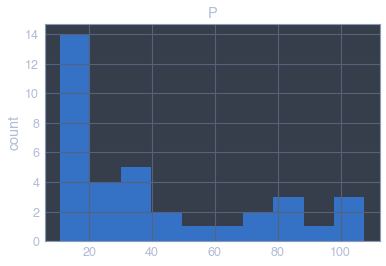

In [8]:
# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('exercise/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

### Importing Stata files

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0

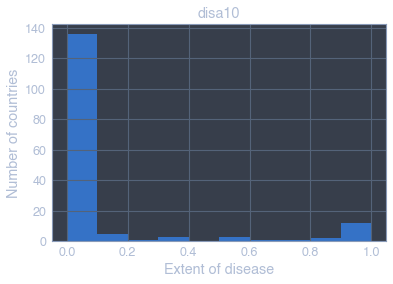

In [9]:
# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('exercise/disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()


## Importing HDF5 files

- HDF5 files
    - Hierarchical Data Format version 5
    - Standard for storing large quantities of numerical data 
    - Datasets can be hundreds of gigabytes or terabytes 
    - HDF5 can scale to exabytes
- Importing HDF5 files
        In [1]: import h5py
        In [2]: filename = 'H-H1_LOSC_4_V1-815411200-4096.hdf5'
        In [3]: data = h5py.File(filename, 'r') # 'r' is to read
        In [4]: print(type(data))
        <class 'h5py._hl.files.File'>
- The structure of HDF5 files
    - explore HDF5 files as a Dictionary, using the method .keys()
            In [5]: for key in data.keys():
                        print(key)
            meta
            quality
            strain
   - meta, quality, strain: each of these is an HDF groip
           In [6]: print(type(data['meta']))
            <class 'h5py._hl.group.Group'>
        - can think of these group as directories
    - Go deeper
            In [7]: for key in data['meta'].keys():
                        print(key)
            Description
            DescriptionURL
            Detector
            ...
            In [8]: print(data['meta']['Description'].value, data['meta']['Detector'].value)
            b'Strain data time series from LIGO' b'H1'
- The HDF Project
    - Actively maintained by the HDF Group
            

### Using h5py to import HDF5 files
- pip install h5py

In [10]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'exercise/L-L1_LOSC_4_V1-1126259446-32.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


### Extracting data from your HDF5 file

Strain


/Users/ellick/anaconda3/envs/datacamp/lib/python3.7/site-packages/ipykernel_launcher.py:9: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if __name__ == '__main__':


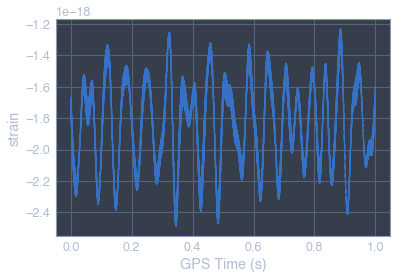

In [11]:
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1 / num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

## Importing MATLAB files

- MATLAB
    - “Matrix Laboratory”
    - Industry standard in engineering and science 
    - Data saved as .mat files
- Use library "scipy" to read & write
    - scipy.io.loadmat() - read .mat files
    - scipy.io.savemat() - write .mat files
- What is a .mat file?
    - A collection of objects
        - such as strings, floats, vectors, array
- Importing a .mat file
    - A .mat file imported in Python is a Dictionary
    - keys = MATLAB variable names 
    - values = objects assigned to variables
            In [1]: import scipy.io
            In [2]: filename = 'workspace.mat'
            In [3]: mat = scipy.io.loadmat(filename)
            In [4]: print(type(mat))
            <class 'dict'>
            In [5]: print(type(mat['x']))
            <class 'numpy.ndarray'>
    

### Loading .mat files
- pip install scipy

In [12]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('exercise/ja_data2.mat')

# Print the datatype type of mat
print(type(mat))

<class 'dict'>


### The structure of .mat in Python

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
<class 'numpy.ndarray'>
(200, 137)


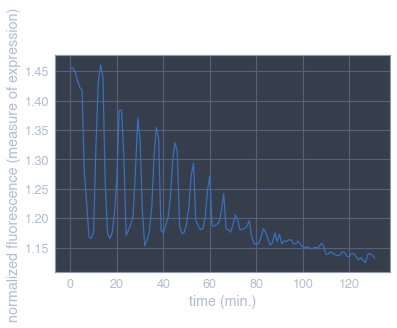

In [13]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'

print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()